# -----------------------------------------------------------
# I. Load and Read Image Annotation (.xml)

In [31]:
import glob
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import cv2

In [32]:
img_src = glob.glob("../bdd100k/bdd100k/images/100k/train/*.jpg")
xml_src = glob.glob("../bdd100k/bdd100k/xml/train/*.xml")

img_name = []
xml_name = []

num_img = 0
for img in img_src:
    num_img += 1
    img_basename = os.path.basename(img)
    img_onlyname = os.path.splitext(img_basename)

    img_name.append(img_onlyname[0])
    
num_xml = 0
for xml in xml_src:
    num_xml += 1
    xml_basename = os.path.basename(xml)
    xml_onlyname = os.path.splitext(xml_basename)

    xml_name.append(xml_onlyname[0])
    
print(num_img, num_xml)

69863 69863


a96d20b4-9cf31240


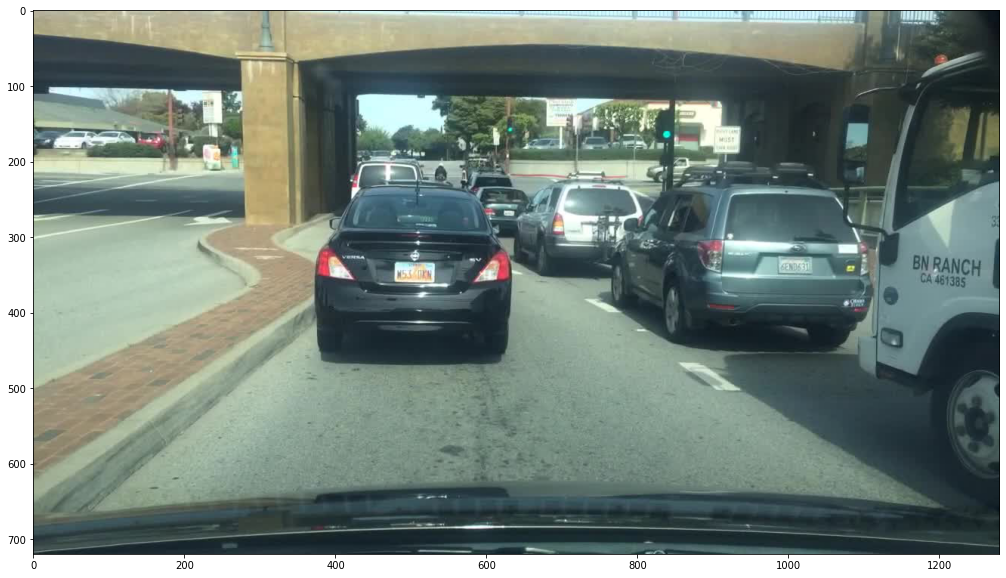

In [87]:
img_index = 11
print(img_name[img_index])

img_path = "../bdd100k/bdd100k/images/100k/train/" + img_name[img_index] + ".jpg"
image = plt.imread(img_path)

plt.figure(figsize = (18, 10))
plt.imshow(image)
plt.show()

In [88]:
xml_path = "../bdd100k/bdd100k/xml/train/" + img_name[img_index] + ".xml"
img_info = []
with open(xml_path, "r") as new_f:
    root = ET.parse(xml_path).getroot()
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        bndbox = obj.find('bndbox')
        left = bndbox.find('xmin').text
        top = bndbox.find('ymin').text
        right = bndbox.find('xmax').text
        bottom = bndbox.find('ymax').text
    
        img_info.append([obj_name, left, top, right, bottom])
        
print("Num of Objs: ", len(img_info))
img_info

Num of Objs:  25


[['car', '139', '162', '175', '188'],
 ['car', '73', '159', '136', '178'],
 ['car', '25', '158', '85', '185'],
 ['car', '0', '157', '8', '167'],
 ['car', '0', '159', '37', '185'],
 ['car', '0', '175', '6', '195'],
 ['car', '413', '197', '522', '252'],
 ['car', '471', '224', '556', '237'],
 ['car', '563', '195', '609', '233'],
 ['car', '569', '213', '635', '258'],
 ['car', '583', '234', '657', '298'],
 ['car', '637', '225', '805', '350'],
 ['car', '762', '199', '1114', '448'],
 ['truck', '811', '194', '906', '230'],
 ['car', '648', '170', '669', '186'],
 ['car', '662', '169', '705', '186'],
 ['car', '724', '168', '762', '191'],
 ['car', '774', '163', '812', '185'],
 ['traffic light', '821', '131', '846', '176'],
 ['traffic light', '628', '139', '636', '162'],
 ['traffic sign', '900', '154', '936', '190'],
 ['rider', '530', '204', '549', '223'],
 ['motor', '534', '219', '544', '227'],
 ['truck', '1064', '57', '1278', '588'],
 ['car', '372', '226', '636', '461']]

# ------------------------------------------------------
# II. Crop and Update Bbox to New XML

## 1. Top-Left Conner

(720, 1280, 3)


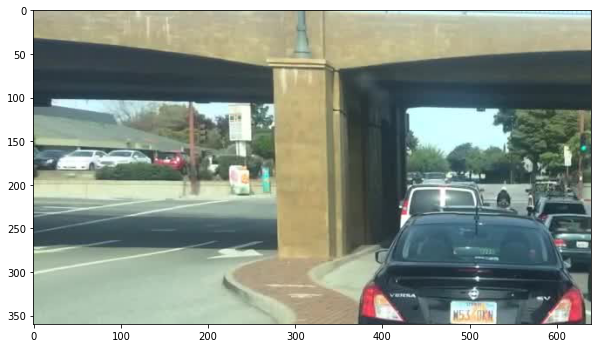

In [92]:
print(image.shape)

new_w = image.shape[1]//2
new_h = image.shape[0]//2

cropped_img = image[0:new_h, 0:new_w]
plt.figure(figsize = (10, 10))
plt.imshow(cropped_img)
plt.show()

In [90]:
new_img_info = []

for obj in img_info:
    if int(obj[1]) < new_w and int(obj[2]) < new_h:
        right = int(obj[3])
        bot = int(obj[4])
        if right > new_w: right = new_w
        if bot > new_h: bot = new_h
            
        new_img_info.append([obj[0], obj[1], obj[2], right, bot])
        
print(len(new_img_info))
new_img_info

16


[['car', '139', '162', 175, 188],
 ['car', '73', '159', 136, 178],
 ['car', '25', '158', 85, 185],
 ['car', '0', '157', 8, 167],
 ['car', '0', '159', 37, 185],
 ['car', '0', '175', 6, 195],
 ['car', '413', '197', 522, 252],
 ['car', '471', '224', 556, 237],
 ['car', '563', '195', 609, 233],
 ['car', '569', '213', 635, 258],
 ['car', '583', '234', 640, 298],
 ['car', '637', '225', 640, 350],
 ['traffic light', '628', '139', 636, 162],
 ['rider', '530', '204', 549, 223],
 ['motor', '534', '219', 544, 227],
 ['car', '372', '226', 636, 360]]

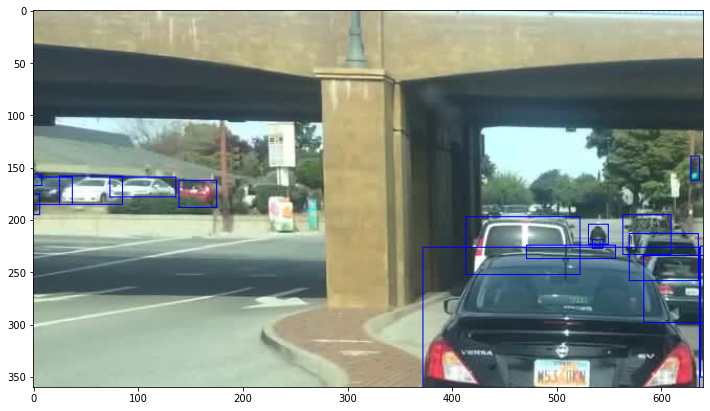

In [91]:
dymmy = cropped_img.copy()

for obj in new_img_info:
    rec_img = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 0, 255), thickness = 1)
                                                               
plt.figure(figsize = (12, 10))
plt.imshow(rec_img)
plt.show()      

## 2. Other Conners